In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.signal import find_peaks

In [3]:
# Relative path to the data file in the parent directory
file_path = ('../data/dsc_fc_summed_spectra_2017_v01.csv')

# Read the CSV using pandas
data = pd.read_csv(file_path, header=None)
print(data.head())

                    0        1         2        3    4    5    6    7    8   \
0  2017-01-01 00:00:00 -4.17863 -4.511830 -3.52434  0.0  0.0  0.0  0.0  0.0   
1  2017-01-01 00:01:00 -6.06788 -0.379552 -3.49708  0.0  0.0  0.0  0.0  0.0   
2  2017-01-01 00:02:00 -5.83430 -3.039940 -2.98546  0.0  0.0  0.0  0.0  0.0   
3  2017-01-01 00:03:00 -5.87318 -3.352910 -2.77476  0.0  0.0  0.0  0.0  0.0   
4  2017-01-01 00:04:00 -5.81431 -3.305190 -2.59870  0.0  0.0  0.0  0.0  0.0   

    9   ...   44   45   46   47   48   49   50   51   52   53  
0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 54 columns]


In [4]:
plt.style.use('default')

In [5]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
count,524528.000000,524528.000000,524528.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,...,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,-0.251033,0.337114,-0.030254,9.680547,8.721720,25.564167,34.968124,51.384674,60.201335,85.959930,...,58.460499,41.496233,38.557738,28.786738,23.587986,16.275130,14.969062,12.264732,13.259206,10.475631
std,3.534637,3.650761,2.880760,47.737049,34.931175,76.667021,87.120034,110.112429,122.716087,156.605629,...,147.351050,117.515330,121.094123,104.824853,91.898263,79.451379,77.003466,68.319734,75.434849,63.335315
min,-20.060900,-20.647900,-33.324400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.935430,-2.128827,-1.518070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.393389,0.300102,-0.020699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.490950,2.656220,1.456775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,194.536000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.462200,27.893800,20.102800,462.628000,499.673000,587.183000,723.864000,929.494000,1735.030000,2270.620000,...,733.651000,622.058000,662.190000,861.944000,696.414000,890.223000,1084.300000,1183.310000,771.201000,846.254000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 54 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       525600 non-null  object 
 1   1       524528 non-null  float64
 2   2       524528 non-null  float64
 3   3       524528 non-null  float64
 4   4       525600 non-null  float64
 5   5       525600 non-null  float64
 6   6       525600 non-null  float64
 7   7       525600 non-null  float64
 8   8       525600 non-null  float64
 9   9       525600 non-null  float64
 10  10      525600 non-null  float64
 11  11      525600 non-null  float64
 12  12      525600 non-null  float64
 13  13      525600 non-null  float64
 14  14      525600 non-null  float64
 15  15      525600 non-null  float64
 16  16      525600 non-null  float64
 17  17      525600 non-null  float64
 18  18      525600 non-null  float64
 19  19      525600 non-null  float64
 20  20      525600 non-null  float64
 21  21      52

In [7]:
data[0]= pd.to_datetime(data[0])
data.replace(0, np.nan, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 54 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   0       525600 non-null  datetime64[ns]
 1   1       524528 non-null  float64       
 2   2       524528 non-null  float64       
 3   3       524528 non-null  float64       
 4   4       21227 non-null   float64       
 5   5       34889 non-null   float64       
 6   6       54529 non-null   float64       
 7   7       77869 non-null   float64       
 8   8       103292 non-null  float64       
 9   9       126193 non-null  float64       
 10  10      154014 non-null  float64       
 11  11      182378 non-null  float64       
 12  12      213968 non-null  float64       
 13  13      237368 non-null  float64       
 14  14      261878 non-null  float64       
 15  15      285524 non-null  float64       
 16  16      304794 non-null  float64       
 17  17      323529 non-null  floa

In [9]:
Bx = data.iloc[:, 1]
By = data.iloc[:, 2]
Bz = data.iloc[:, 3]
data['magnitude'] = ((Bx ** 2) + (By ** 2) + (Bz ** 2))**0.5

In [10]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,magnitude
0,2017-01-01 00:00:00,-4.17863,-4.511830,-3.52434,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.087914
1,2017-01-01 00:01:00,-6.06788,-0.379552,-3.49708,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.013758
2,2017-01-01 00:02:00,-5.83430,-3.039940,-2.98546,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.224491
3,2017-01-01 00:03:00,-5.87318,-3.352910,-2.77476,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.309962
4,2017-01-01 00:04:00,-5.81431,-3.305190,-2.59870,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.175216


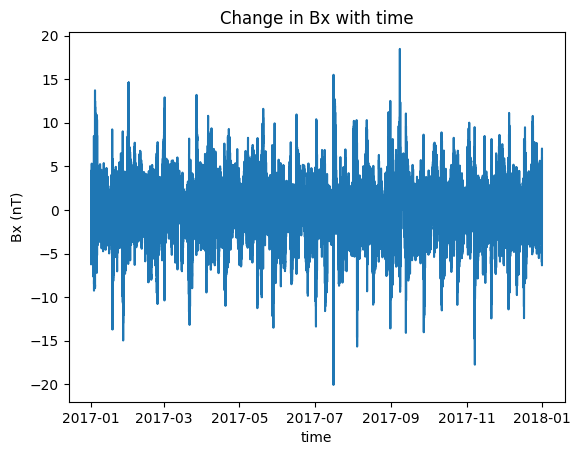

In [11]:
# Figure of Bx with time
date = data.iloc[:, 0]
plt.title('Change in Bx with time')
plt.xlabel('time')
plt.ylabel('Bx (nT)')
plt.plot(date, Bx)
plt.show()

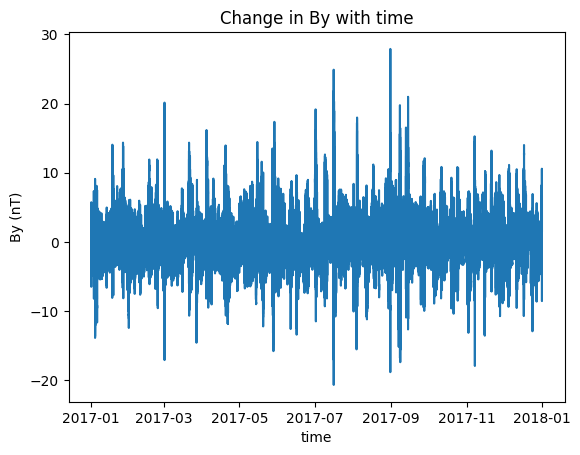

In [12]:
# Figure of By with time
date = data.iloc[:, 0]
plt.title('Change in By with time')
plt.xlabel('time')
plt.ylabel('By (nT)')
plt.plot(date, By)
plt.show()

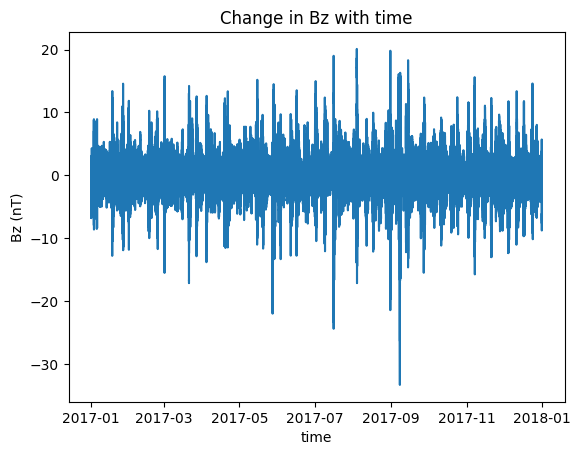

In [13]:
# Figure of Bz with time
date = data.iloc[:, 0]
plt.plot(date, Bz)
plt.title('Change in Bz with time')
plt.xlabel('time')
plt.ylabel('Bz (nT)')
plt.show()

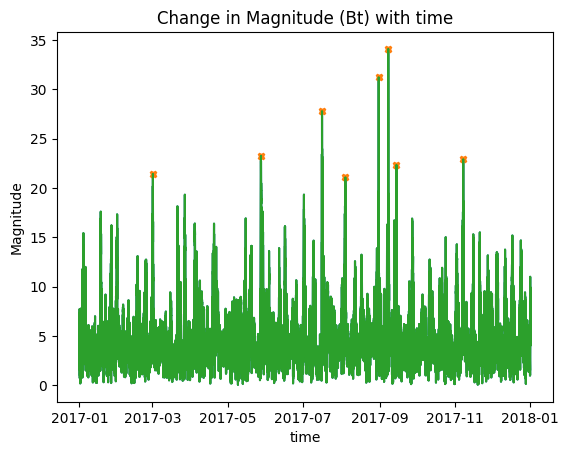

In [14]:
peaks, _ = find_peaks(data['magnitude'], height=20, prominence=19)
# Figure of magnitude (Bt) with time
date = data.iloc[:, 0]
plt.plot(date, data['magnitude'])
plt.plot(date[peaks], data['magnitude'][peaks], "X", markersize=5)
plt.plot(date, data['magnitude'])
plt.title('Change in Magnitude (Bt) with time')
plt.xlabel('time')
plt.ylabel('Magnitude')
plt.show()

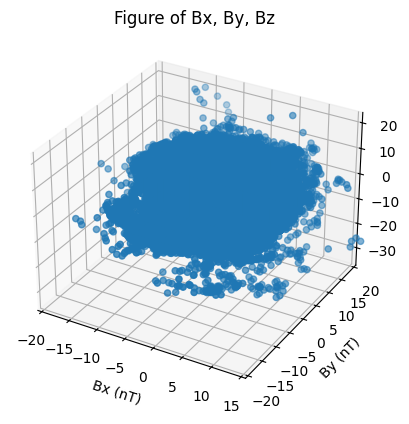

In [15]:
# Figure of Bx, By, Bz
# Matplotlib does not accomodate for third axes (z) but just note that the third axes is for 'Bz'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.xlim(-20, 15)
plt.ylim(-20, 20)
plt.title('Figure of Bx, By, Bz')
plt.xlabel('Bx (nT)')
plt.ylabel('By (nT)')
ax.scatter(Bx, By, Bz)
plt.show()